# Beyond gradient descent
## Метод сопряжённых градиентов, тяжёлого шарика и ускоренный метод Нестерова

## Система линейных уравнений vs. задача безусловной минимизации
Рассмотрим задачу

$$
\min_{x \in \mathbb{R}^n} \frac{1}{2}x^{\top}Ax - b^{\top}x,
$$

где $A \in \mathbb{S}^n_{++}$.
Из необходимого условия экстремума имеем

$$
Ax^* = b
$$

Также обозначим $f'(x_k) = Ax_k - b = r_k$

## Как решить систему $Ax = b$?

- Прямые методы основаны на матричных разложениях:
    - Плотная матрица $A$: для размерностей не больше нескольких тысяч
    - Разреженная (sparse) матрица $A$: для размерностей порядка $10^4 - 10^5$
- Итерационные методы: хороши во многих случаях, единственный подход для задач с размерностью $ > 10^6$

## Метод сопряжённых направлений

В градиентном спуске направления убывания - анти-градиенты, но для функций с плохо обусловленным гессианом сходимость **медленная**.

**Идея:** двигаться вдоль направлений, которые гарантируют сходимость за $n$ шагов.

**Определение.** Множество ненулевых векторов $\{p_0, \ldots, p_l\}$ называется *сопряжённым* относительно матрицы $A \in \mathbb{S}^n_{++}$, если 

$$
p^{\top}_iAp_j = 0, \qquad i \neq j
$$

**Утверждение.** Для любой $x_0 \in \mathbb{R}^n$ последовательность $\{x_k\}$, генерируемая методом сопряжённых направлений, сходится к решению системы $Ax = b$ максимум за $n$ шагов.

```python
def ConjugateDirections(x0, A, b, p):
    x = x0
    r = A.dot(x) - b
    for i in range(len(p)):
        alpha = - (r.dot(p[i])) / (p[i].dot(A.dot(p[i])))
        x = x + alpha * p[i]
        r = A.dot(x) - b
    return x
```

### Примеры сопряжённых направлений

- Собственные векторы матрицы $A$
- Для любого набора из $n$ векторов можно провести аналог ортогонализации Грама-Шмидта и получить сопряжённые направления

**Вопрос:** что такое ортогонализация Грама-Шмидта? :)

### Геометрическая интерпретация (Mathematics Stack Exchange)

<center><img src="./cg.png" ></center>

## Метод сопряжённых градиентов

**Идея:** новое направление $p_k$ ищется в виде $p_k = -r_k + \beta_k p_{k-1}$, где $\beta_k$ выбирается, исходя из требования сопряжённости $p_k$ и $p_{k-1}$:

$$
\beta_k = \dfrac{p^{\top}_{k-1}Ar_k}{p^{\top}_{k-1}Ap^{\top}_{k-1}}
$$

Таким образом, для получения следующего сопряжённого направления $p_k$ необходимо хранить только сопряжённое направление $p_{k-1}$ и остаток $r_k$ с предыдущей итерации. 

**Вопрос:** как находить размер шага $\alpha_k$?

## Сопряжённость сопряжённых градиентов

**Теорема**
Пусть после $k$ итераций $x_k \neq x^*$. Тогда 

- $\langle r_k, r_i \rangle = 0, \; i = 1, \ldots k - 1$
- $\mathtt{span}(r_0, \ldots, r_k) = \mathtt{span}(r_0, Ar_0, \ldots, A^kr_0)$
- $\mathtt{span}(p_0, \ldots, p_k) = \mathtt{span}(r_0, Ar_0, \ldots, A^kr_0)$
- $p_k^{\top}Ap_i = 0$, $i = 1,\ldots,k-1$

### Теоремы сходимости

**Теорема 1.** Если матрица $A$ имеет только $r$ различных собственных значений, то метод сопряжённых градиентов cойдётся за $r$ итераций.

**Теорема 2.** Имеет место следующая оценка сходимости

$$
\| x_{k} - x^* \|_A \leq 2\left( \dfrac{\sqrt{\kappa(A)} - 1}{\sqrt{\kappa(A)} + 1} \right)^k \|x_0 - x^*\|_A,
$$

где $\|x\|_A = x^{\top}Ax$ и $\kappa(A) = \frac{\lambda_1(A)}{\lambda_n(A)}$ - число обусловленности матрицы $A$, $\lambda_1(A) \geq ... \geq \lambda_n(A)$ - собственные значения матрицы $A$

**Замечание:** сравните коэффициент геометрической прогрессии с аналогом в градиентном спуске.

### Интерпретации метода сопряжённых градиентов

- Градиентный спуск в пространстве $y = Sx$, где $S = [p_0, \ldots, p_n]$, в котором матрица $A$ становится диагональной (или единичной в случае ортонормированности сопряжённых направлений)
- Поиск оптимального решения в [Крыловском подпространстве](https://stanford.edu/class/ee364b/lectures/conj_grad_slides.pdf) $\mathcal{K}_k(A) = \{b, Ab, A^2b, \ldots A^{k-1}b\}$

$$
x_k = \arg\min_{x \in \mathcal{K}_k} f(x)
$$

- Однако естественный базис Крыловского пространства неортогональный и, более того, **плохо обусловлен**.

**Упражнение** Проверьте численно, насколько быстро растёт обусловленность матрицы из векторов $\{b, Ab, ... \}$

- Поэтому его необходимо ортогонализовать, что и происходит в методе сопряжённых градиентов

### Основное свойство
$$ 
A^{-1}b \in \mathcal{K}_n(A)
$$

Доказательство

- Теорема Гамильтона-Кэли: $p(A) = 0$, где $p(\lambda) = \det(A - \lambda I)$
- $p(A)b = A^nb + a_1A^{n-1}b + \ldots + a_{n-1}Ab + a_n b = 0$
- $A^{-1}p(A)b = A^{n-1}b + a_1A^{n-2}b + \ldots + a_{n-1}b + a_nA^{-1}b = 0$
- $A^{-1}b = -\frac{1}{a_n}(A^{n-1}b + a_1A^{n-2}b + \ldots + a_{n-1}b)$

### Улучшенная версия метода сопряжённых градиентов
На практике используются следующие формулы для шага $\alpha_k$ и коэффициента $\beta_{k}$:

$$
\alpha_k = \dfrac{r^{\top}_k r_k}{p^{\top}_{k}Ap_{k}} \qquad \beta_k = \dfrac{r^{\top}_k r_k}{r^{\top}_{k-1} r_{k-1}}
$$

**Вопрос:** чем они лучше базовой версии?

### Псевдокод метода сопряжённых градиентов
```python
def ConjugateGradientQuadratic(x0, A, b, eps):
    r = A.dot(x0) - b
    p = -r
    while np.linalg.norm(r) > eps:
        alpha = r.dot(r) / p.dot(A.dot(p))
        x = x + alpha * p
        r_next = r + alpha * A.dot(p)
        beta = r_next.dot(r_next) / r.dot(r)
        p = -r_next + beta * p
        r = r_next
    return x
```

## Метод сопряжённых градиентов для неквадратичной функции
**Идея:** использовать градиенты $f'(x_k)$ неквадратичной функции вместо остатков $r_k$ и линейный поиск шага $\alpha_k$ вместо аналитического вычисления. Получим метод Флетчера-Ривса.

```python
def ConjugateGradientFR(f, gradf, x0, eps):
    x = x0
    grad = gradf(x)
    p = -grad
    while np.linalg.norm(gradf(x)) > eps:
        alpha = StepSearch(x, f, gradf, **kwargs)
        x = x + alpha * p
        grad_next = gradf(x)
        beta = grad_next.dot(grad_next) / grad.dot(grad)
        p = -grad_next + beta * p
        grad = grad_next
        if restart_condition:
            p = -gradf(x)
    return x
```

### Теорема сходимости

**Теорема.** Пусть 
- множество уровней $\mathcal{L}$ ограничено
- существует $\gamma > 0$: $\| f'(x) \|_2 \leq \gamma$ для $x \in \mathcal{L}$
Тогда

$$
\lim_{j \to \infty} \| f'(x_{k_j}) \|_2 = 0
$$

### Перезапуск (restart)

1. Для ускорения метода сопряжённых градиентов используют технику перезапусков: удаление ранее накопленной истории и перезапуск метода с текущей точки, как будто это точка $x_0$
2. Существуют разные условия, сигнализирующие о том, что надо делать перезапуск, например
    - $k = n$
    - $\dfrac{|\langle f'(x_k), f'(x_{k-1}) \rangle |}{\| f'(x_k) \|_2^2} \geq \nu \approx 0.1$
3. Можно показать (см. Nocedal, Wright Numerical Optimization, Ch. 5, p. 125), что запуск метода Флетчера-Ривза без использования перезапусков на некоторых итерациях может приводить к крайне медленной сходимости! 
4. Метод Полака-Рибьера и его модификации лишены подобного недостатка.

### Комментарии
- Замечательная методичка "An Introduction to the Conjugate Gradient Method Without the Agonizing Pain" размещена [тут](https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf)
- Помимо метода Флетчера-Ривса существуют другие способы вычисления $\beta_k$: метод Полака-Рибьера, метод Хестенса-Штифеля...
- Для метода сопряжённых градиентов требуется 4 вектора: каких?
- Самой дорогой операцией является умножение матрицы на вектор

## Эксперименты


### Квадратичная целевая функция

In [86]:
import numpy as np
n = 100
# Random
# A = np.random.randn(n, n)
# A = A.T.dot(A)
# Clustered eigenvalues
A = np.diagflat([np.ones(n//4), 10 * np.ones(n//4), 100*np.ones(n//4), 1000* np.ones(n//4)])
U = np.random.rand(n, n)
Q, _ = np.linalg.qr(U)
A = Q.dot(A).dot(Q.T)
A = (A + A.T) * 0.5
print("A is normal matrix: ||AA* - A*A|| =", np.linalg.norm(A.dot(A.T) - A.T.dot(A)))
b = np.random.randn(n)
# Hilbert matrix
# A = np.array([[1.0 / (i+j - 1) for i in range(1, n+1)] for j in range(1, n+1)])
# b = np.ones(n)

f = lambda x: 0.5 * x.dot(A.dot(x)) - b.dot(x)
grad_f = lambda x: A.dot(x) - b
x0 = np.zeros(n)

A is normal matrix: ||AA* - A*A|| = 0.0


#### Распределение собственных значений

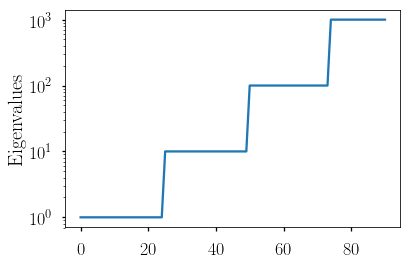

In [87]:
USE_COLAB = False

%matplotlib inline
import matplotlib.pyplot as plt
if not USE_COLAB:
    plt.rc("text", usetex=True)
    plt.rc("font", family='serif')
    
if USE_COLAB:
    !pip install git+https://github.com/amkatrutsa/liboptpy

import seaborn as sns
sns.set_context("talk")

eigs = np.linalg.eigvalsh(A)
plt.semilogy(np.unique(eigs))
plt.ylabel("Eigenvalues", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

#### Правильный ответ

In [88]:
import scipy.optimize as scopt

def callback(x, array):
    array.append(x)

In [89]:
scopt_cg_array = []
scopt_cg_callback = lambda x: callback(x, scopt_cg_array)
x = scopt.minimize(f, x0, method="CG", jac=grad_f, callback=scopt_cg_callback)
x = x.x
print("||f'(x*)|| =", np.linalg.norm(A.dot(x) - b))
print("f* =", f(x))

||f'(x*)|| = 2.5680996151119215e-05
f* = -16.684068162972558


#### Реализация метода сопряжённых градиентов

In [90]:
def ConjugateGradientQuadratic(x0, A, b, tol=1e-8, callback=None):
    x = x0
    r = A.dot(x0) - b
    p = -r
    while np.linalg.norm(r) > tol:
        alpha = r.dot(r) / p.dot(A.dot(p))
        x = x + alpha * p
        if callback is not None:
            callback(x)
        r_next = r + alpha * A.dot(p)
        beta = r_next.dot(r_next) / r.dot(r)
        p = -r_next + beta * p
        r = r_next
    return x

In [91]:
import liboptpy.unconstr_solvers as methods
import liboptpy.step_size as ss

max_iter = 200
print("\t CG quadratic")
cg_quad = methods.fo.ConjugateGradientQuad(A, b)
x_cg = cg_quad.solve(x0, tol=1e-7, max_iter=max_iter, disp=True)

print("\t Gradient Descent")
gd = methods.fo.GradientDescent(f, grad_f, ss.ExactLineSearch4Quad(A, b))
x_gd = gd.solve(x0, tol=1e-7, max_iter=max_iter, disp=True)

print("Condition number of A =", abs(max(eigs)) / abs(min(eigs)))

	 CG quadratic
Required tolerance achieved!
Convergence in 4 iterations
Function value = -16.684068163237402
Norm of gradient = 10.259440726997983
	 Gradient Descent
Maximum iteration exceeds!
Convergence in 200 iterations
Function value = -11.301991256270835
Norm of gradient = 6.413134537982113
Condition number of A = 1000.0000000005299


#### График сходимости

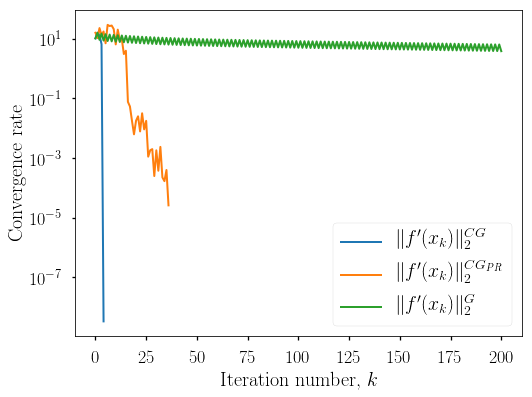

In [92]:
plt.figure(figsize=(8,6))
plt.semilogy([np.linalg.norm(grad_f(x)) for x in cg_quad.get_convergence()], label=r"$\|f'(x_k)\|^{CG}_2$", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in scopt_cg_array[:max_iter]], label=r"$\|f'(x_k)\|^{CG_{PR}}_2$", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in gd.get_convergence()], label=r"$\|f'(x_k)\|^{G}_2$", linewidth=2)
plt.legend(loc="best", fontsize=20)
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel("Convergence rate", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

In [93]:
print([np.linalg.norm(grad_f(x)) for x in cg_quad.get_convergence()])

[10.259440726997983, 15.868420455381095, 13.42629012327298, 6.547907882559818, 3.2909378361470817e-09]


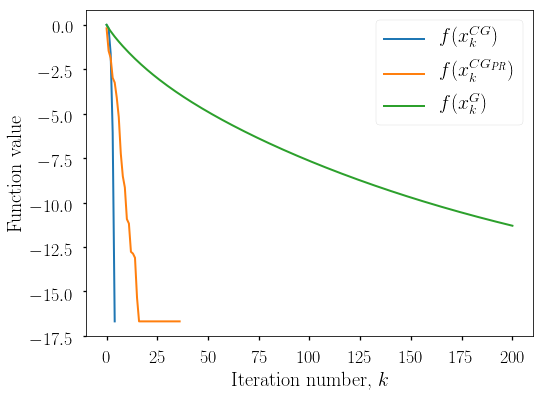

In [94]:
plt.figure(figsize=(8,6))
plt.plot([f(x) for x in cg_quad.get_convergence()], label=r"$f(x^{CG}_k)$", linewidth=2)
plt.plot([f(x) for x in scopt_cg_array], label=r"$f(x^{CG_{PR}}_k)$", linewidth=2)
plt.plot([f(x) for x in gd.get_convergence()], label=r"$f(x^{G}_k)$", linewidth=2)
plt.legend(loc="best", fontsize=20)
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel("Function value", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

### Неквадратичная функция

In [10]:
import numpy as np
import sklearn.datasets as skldata
import scipy.special as scspec

n = 300
m = 1000

X, y = skldata.make_classification(n_classes=2, n_features=n, n_samples=m, n_informative=n//3)
C = 1
def f(w):
    return np.linalg.norm(w)**2 / 2 +  C * np.mean(np.logaddexp(np.zeros(X.shape[0]), -y * X.dot(w)))

def grad_f(w):
    denom = scspec.expit(-y * X.dot(w))
    return w - C * X.T.dot(y * denom) / X.shape[0]
# f = lambda x: -np.sum(np.log(1 - A.T.dot(x))) - np.sum(np.log(1 - x*x))
# grad_f = lambda x: np.sum(A.dot(np.diagflat(1 / (1 - A.T.dot(x)))), axis=1) + 2 * x / (1 - np.power(x, 2))
x0 = np.zeros(n)
print("Initial function value = {}".format(f(x0)))
print("Initial gradient norm = {}".format(np.linalg.norm(grad_f(x0))))

Initial function value = 0.6931471805599454
Initial gradient norm = 1.8498936102107062


#### Реализация метода Флетчера-Ривса

In [11]:
def ConjugateGradientFR(f, gradf, x0, num_iter=100, tol=1e-8, callback=None, restart=False):
    x = x0
    grad = gradf(x)
    p = -grad
    it = 0
    while np.linalg.norm(gradf(x)) > tol and it < num_iter:
        alpha = utils.backtracking(x, p, method="Wolfe", beta1=0.1, beta2=0.4, rho=0.5, f=f, grad_f=gradf)
        if alpha < 1e-18:
            break
        x = x + alpha * p
        if callback is not None:
            callback(x)
        grad_next = gradf(x)
        beta = grad_next.dot(grad_next) / grad.dot(grad)
        p = -grad_next + beta * p
        grad = grad_next.copy()
        it += 1
        if restart and it % restart == 0:
            grad = gradf(x)
            p = -grad
    return x

#### График сходимости

In [12]:
import scipy.optimize as scopt
import liboptpy.restarts as restarts

n_restart = 60
tol = 1e-5
max_iter = 600

scopt_cg_array = []
scopt_cg_callback = lambda x: callback(x, scopt_cg_array)
x = scopt.minimize(f, x0, tol=tol, method="CG", jac=grad_f, callback=scopt_cg_callback, options={"maxiter": max_iter})
x = x.x
print("\t CG by Polak-Rebiere")
print("Norm of garient = {}".format(np.linalg.norm(grad_f(x))))
print("Function value = {}".format(f(x)))

print("\t CG by Fletcher-Reeves")
cg_fr = methods.fo.ConjugateGradientFR(f, grad_f, ss.Backtracking("Wolfe", rho=0.9, beta1=0.1, beta2=0.4, init_alpha=1.))
x = cg_fr.solve(x0, tol=tol, max_iter=max_iter, disp=True)

print("\t CG by Fletcher-Reeves with restart n")
cg_fr_rest = methods.fo.ConjugateGradientFR(f, grad_f, ss.Backtracking("Wolfe", rho=0.9, beta1=0.1, beta2=0.4, 
                                         init_alpha=1.), restarts.Restart(n // n_restart))
x = cg_fr_rest.solve(x0, tol=tol, max_iter=max_iter, disp=True)

print("\t Gradient Descent")
gd = methods.fo.GradientDescent(f, grad_f, ss.Backtracking("Wolfe", rho=0.9, beta1=0.1, beta2=0.4, init_alpha=1.))
x = gd.solve(x0, max_iter=max_iter, tol=tol, disp=True)

	 CG by Polak-Rebiere
Norm of garient = 1.6484969556658043e-05
Function value = 0.49483663890603563
	 CG by Fletcher-Reeves
Required tolerance achieved!
Convergence in 57 iterations
Function value = 0.49483663887608353
Norm of gradient = 5.872395980573383e-06
	 CG by Fletcher-Reeves with restart n
Required tolerance achieved!
Convergence in 78 iterations
Function value = 0.4948366388787173
Norm of gradient = 7.131176970078345e-06
	 Gradient Descent
Required tolerance achieved!
Convergence in 273 iterations
Function value = 0.4948366389014738
Norm of gradient = 9.03262394513751e-06


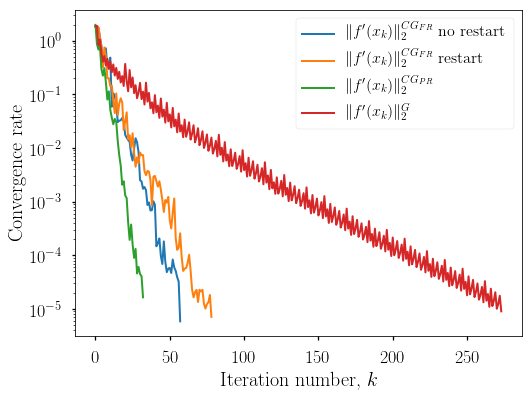

In [13]:
plt.figure(figsize=(8, 6))
plt.semilogy([np.linalg.norm(grad_f(x)) for x in cg_fr.get_convergence()], label=r"$\|f'(x_k)\|^{CG_{FR}}_2$ no restart", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in cg_fr_rest.get_convergence()], label=r"$\|f'(x_k)\|^{CG_{FR}}_2$ restart", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in scopt_cg_array], label=r"$\|f'(x_k)\|^{CG_{PR}}_2$", linewidth=2)

plt.semilogy([np.linalg.norm(grad_f(x)) for x in gd.get_convergence()], label=r"$\|f'(x_k)\|^{G}_2$", linewidth=2)
plt.legend(loc="best", fontsize=16)
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel("Convergence rate", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

#### Время выполнения

In [14]:
%timeit scopt.minimize(f, x0, method="CG", tol=tol, jac=grad_f, options={"maxiter": max_iter})
%timeit cg_fr.solve(x0, tol=tol, max_iter=max_iter)
%timeit cg_fr_rest.solve(x0, tol=tol, max_iter=max_iter)
%timeit gd.solve(x0, tol=tol, max_iter=max_iter)

17.3 ms ± 1.86 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
130 ms ± 20 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
141 ms ± 22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
437 ms ± 23.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Резюме

1. Сопряжённые направления
2. Метод сопряжённых градиентов
3. Сходимость
4. Эксперименты

## Схема получения оценок снизу на сложность методов и задач

- Фиксируем класс функций $\mathcal{F}$
- Фиксируем класс методов оптимизации $\mathcal{M}$
- Ищем настолько плохую функцию из класса $\mathcal{F}$, что любой метод из класса $\mathcal{M}$ сходится не лучше, чем некоторая оценка
- Такая оценка называется оценкой снизу

## Пример
### Фиксируем класс методов

Рассмотрим такие методы, что

$$
x_{k+1} = x_0 + \texttt{span}\{f'(x_0), \ldots, f'(x_k)\}
$$

- Далее в рамках этого семинара для краткости только такие методы будем называть методами первого порядка
- Весь последующий анализ **НЕ** применим, если 

$$
x_{k+1} = x_0 + G(f'(x_0), \ldots, f'(x_k)),
$$

где $G$ - некоторая нелинейная функция

-  С такими методами мы познакомимся ближе к середине семестра

### Фиксируем класс функций
#### Выпуклые функции с липшицевым градиентом

**Теорема.** Существует выпуклая функция с Липшицевым градиентом, такая что

$$
f(x_t) - f^* \geq \frac{3L\|x_0 - x^*\|_2^2}{32(t+1)^2},
$$

где $x_k = x_0 + \texttt{span}\{f'(x_0), \ldots, f'(x_{k-1})\}$, $1 \leq k \leq t$

Привести пример такой функции и доказать эту теорему Вам надо в домашнем задании.

#### Сильно выпуклые функции с липшицевым градиентом

**Теорема.** Существует сильно выпуклая функция с Липшицевым градиентом, такая что

$$
f(x_t) - f^* \geq \frac{\mu}{2}\left( \frac{\sqrt{\kappa} - 1}{\sqrt{\kappa} + 1} \right)^{2t}\|x_0 - x^*\|_2^2,
$$

где $\kappa = \frac{L}{\mu}$ и $x_k = x_0 + \texttt{span}\{f'(x_0), \ldots, f'(x_{k-1})\}$, $1 \leq k \leq t$


Привести пример такой функции и доказать эту теорему Вам надо в домашнем задании.

## Оценки сходимости известных методов
### Оценки сходимости для градиентного спуска: напоминание

- Пусть
    - $f(x)$ дифференцируема на $\mathbb{R}^n$
    - $f(x)$ выпукла 
    - $f'(x)$ удовлетворяет условию Липшица с константой $L$
    - $\alpha = \dfrac{1}{L}$

    Тогда 

    $$
    f(x_k) - f^* \leq \dfrac{2L \| x_0 - x^*\|^2_2}{k+4}
    $$
    
- Пусть
    - $f(x)$ дифференцируема на $\mathbb{R}^n$, 
    - градиент $f(x)$ удовлетворяет условию Липшица с константой $L$
    - $f(x)$ является сильно выпуклой с константой $\mu$
    - $\alpha = \dfrac{2}{\mu + L}$

    Тогда для градиентного спуска выполнено:

    $$
    \| x_k - x^* \|_2 \leq \left( \dfrac{\kappa - 1}{\kappa + 1} \right)^k \|x_0 - x^*\|_2
    $$ 
    
    $$f(x_k) - f^* \leq \dfrac{L}{2} \left( \dfrac{\kappa - 1}{\kappa + 1} \right)^{2k} \| x_0 - x^*\|^2_2,
    $$

    где $\kappa = \frac{L}{\mu}$

### Оценки сходимости для метода сопряжённых градиентов: напоминание

Для сильно выпуклой квадратичной функции

$$
f(x) = \frac{1}{2}x^{\top}Ax - b^{\top}x
$$ 

и метода сопряжённых градиентов справедлива следующая оценка сходимости 


$$
2 (f_k - f^*) = \| x_{k} - x^* \|_A \leq 2\left( \dfrac{\sqrt{\kappa(A)} - 1}{\sqrt{\kappa(A)} + 1} \right)^k \|x_0 - x^*\|_A,
$$

где $\kappa(A) = \frac{\lambda_1(A)}{\lambda_n(A)} = \frac{L}{\mu}$ - число обусловленности матрицы $A$, $\lambda_1(A) \geq ... \geq \lambda_n(A) > 0$ - собственные значения матрицы $A$

## Can we do better?

Существует ли метод, который сходится в соответствии с нижними оценками для
- произвольной сильно выпуклой функции с липшицевым градиентом (не только квадратичной)?
- произвольной выпуклой функции с липшицевым градиентом?

## Метод тяжёлого шарика (heavy-ball method)

- [Предложен](http://www.mathnet.ru/links/453550bb5a36d7ff295e9a39c3333607/zvmmf7713.pdf) в 1964 г. [Б.Т. Поляком](https://scholar.google.ru/citations?user=Zhlib28AAAAJ&hl=ru&oi=ao)
<img src="./polyak.jpeg">
- Для квадратичной целевой функции зигзагообразное поведение градиентного спуска обусловлено неоднородностью направлений
- Давайте учитывать предыдущие направления для поиска новой точки
- Метод тяжёлого шарика

$$
x_{k+1} = x_k - \alpha_k f'(x_k) + {\color{red}{\beta_k(x_k - x_{k-1})}}
$$

- Помимо параметра шага вдоль антиградиента $\alpha_k$ появился ещё один параметр $\beta_k$

### Геометрическая интерпретация метода тяжёлого шарика

Картинка [отсюда](https://www.princeton.edu/~yc5/ele538_optimization/lectures/accelerated_gradient.pdf) 
<img src="./heavy_ball.png" width=600 align="center">

### Теорема сходимости

Пусть $f$ сильно выпукла с Липшицевым градиентом. Тогда для 

$$
\alpha_k = \frac{4}{(\sqrt{L} + \sqrt{\mu})^2}
$$ 

и 

$$
\beta_k = \max(|1 - \sqrt{\alpha_k L}|^2, |1 - \sqrt{\alpha_k \mu}|^2)
$$ 

справедлива следующая оценка сходимости

$$ 
\left\| \begin{bmatrix} x_{k+1} - x^* \\ x_k - x^* \end{bmatrix} \right\|_2
\leq 
\left( \frac{\sqrt{\kappa} - 1}{\sqrt{\kappa} + 1} \right)^k \left \|
\begin{bmatrix} x_1 - x^* \\ x_0 - x^* \end{bmatrix}
\right \|_2
$$

- Совпадает с оценкой снизу для методов первого порядка!
- Оптимальные параметры $\alpha_k$ и $\beta_k$ определяются через **неизвестные** константы $L$ и $\mu$

### Эксперименты

### Тестовая задача 1

$$
f(x) = \frac{1}{2}x^{\top}Ax - b^{\top}x \to \min_x,
$$

где матрица $A$ плохо обусловлена, но положительно определена!

In [15]:
USE_COLAB = False
if USE_COLAB:
    !pip install git+https://github.com/amkatrutsa/liboptpy

import liboptpy.base_optimizer as base
import numpy as np
import liboptpy.unconstr_solvers.fo as fo
import liboptpy.step_size as ss
import matplotlib.pyplot as plt
%matplotlib inline

if not USE_COLAB:
    plt.rc("text", usetex=True)

class HeavyBall(base.LineSearchOptimizer):
    def __init__(self, f, grad, step_size, beta, **kwargs):
        super().__init__(f, grad, step_size, **kwargs)
        self._beta = beta
    
    def get_direction(self, x):
        self._current_grad = self._grad(x)
        return -self._current_grad

    def _f_update_x_next(self, x, alpha, h):
        if len(self.convergence) < 2:
            return x + alpha * h
        else:
            return x + alpha * h + self._beta * (x - self.convergence[-2])
    
    def get_stepsize(self):
        return self._step_size.get_stepsize(self._grad_mem[-1], self.convergence[-1], len(self.convergence))

In [16]:
np.random.seed(42)
n = 20
A = np.random.randn(n, n)
A = A.T.dot(A)
x_true = np.random.randn(n)
b = A.dot(x_true)
f = lambda x: 0.5 * x.dot(A.dot(x)) - b.dot(x)
grad = lambda x: A.dot(x) - b
A_eigvals = np.linalg.eigvalsh(A)
L = np.max(A_eigvals)
mu = np.min(A_eigvals)
print(L, mu)
print("Condition number = {}".format(L / mu))
alpha_opt = 4 / (np.sqrt(L) + np.sqrt(mu))**2 
beta_opt = np.maximum((1 - np.sqrt(alpha_opt * L))**2, 
                      (1 - np.sqrt(alpha_opt * mu))**2)
print(alpha_opt, beta_opt)
beta_test = 0.95

54.636484491885916 0.02002751288267095
Condition number = 2728.0713692193303
0.07048629085801521 0.9262674012263596


In [17]:
methods = {
    "GD fixed": fo.GradientDescent(f, grad, ss.ConstantStepSize(1 / L)),
    "GD Armijo": fo.GradientDescent(f, grad, 
            ss.Backtracking("Armijo", rho=0.5, beta=0.1, init_alpha=1.)),
    r"HB, $\beta = {}$".format(beta_test): HeavyBall(f, grad, ss.ConstantStepSize(1 / L), beta=beta_test),
    "HB optimal": HeavyBall(f, grad, ss.ConstantStepSize(alpha_opt), beta = beta_opt),
    "CG": fo.ConjugateGradientQuad(A, b)
}
x0 = np.random.randn(n)
max_iter = 1500
tol = 1e-6

In [18]:
for m in methods:
    _ = methods[m].solve(x0=x0, max_iter=max_iter, tol=tol)

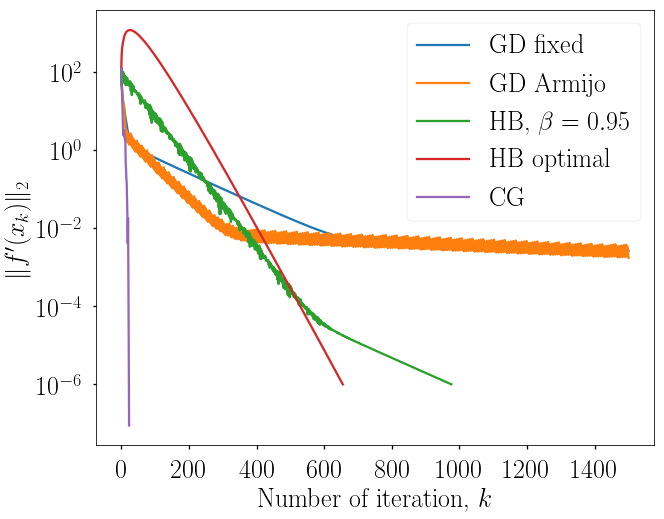

In [19]:
figsize = (10, 8)
fontsize = 26
plt.figure(figsize=figsize)
for m in methods:
    plt.semilogy([np.linalg.norm(grad(x)) for x in methods[m].get_convergence()], label=m)
plt.legend(fontsize=fontsize, loc="best")
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$\| f'(x_k)\|_2$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

In [20]:
for m in methods:
    print(m)
    %timeit methods[m].solve(x0=x0, max_iter=max_iter, tol=tol)

GD fixed
19.7 ms ± 702 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
GD Armijo
127 ms ± 16.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
HB, $\beta = 0.95$
17.6 ms ± 2.21 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
HB optimal
11.1 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
CG
610 µs ± 60.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### Тестовая задача 2

$$
f(x) = - \sum_{i=1}^m \log(1 - a_i^{\top}x) - \sum_{i = 1}^n \log (1 - x^2_i) \to \min_x
$$

In [33]:
n = 300
m = 1000

X, y = skldata.make_classification(n_classes=2, n_features=n, n_samples=m, n_informative=n//3)
C = 1
def f(w):
    return np.linalg.norm(w)**2 / 2 +  C * np.mean(np.logaddexp(np.zeros(X.shape[0]), -y * X.dot(w)))

def grad(w):
    denom = scspec.expit(-y * X.dot(w))
    return w - C * X.T.dot(y * denom) / X.shape[0]
# f = lambda x: -np.sum(np.log(1 - A.T.dot(x))) - np.sum(np.log(1 - x*x))
# grad_f = lambda x: np.sum(A.dot(np.diagflat(1 / (1 - A.T.dot(x)))), axis=1) + 2 * x / (1 - np.power(x, 2))
x0 = np.zeros(n)
print("Initial function value = {}".format(f(x0)))
print("Initial gradient norm = {}".format(np.linalg.norm(grad_f(x0))))

Initial function value = 0.6931471805599454
Initial gradient norm = 3.162355035311704


In [67]:
alpha_test = 5e-3
beta_test = 0.9

methods = {
    r"GD, $\alpha_k = {}$".format(alpha_test): fo.GradientDescent(f, grad, ss.ConstantStepSize(alpha_test)),
    "GD Armijo": fo.GradientDescent(f, grad, 
            ss.Backtracking("Armijo", rho=0.7, beta=0.1, init_alpha=1.)),
    r"HB, $\beta = {}$".format(beta_test): HeavyBall(f, grad, ss.ConstantStepSize(alpha_test), beta=beta_test),
    
}
# x0 = np.random.rand(n)
x0 = np.zeros(n)
max_iter = 400
tol = 1e-5

In [68]:
for m in methods:
    print(m)
    _ = methods[m].solve(x0=x0, max_iter=max_iter, tol=tol)
    
scopt_cg_array = []
scopt_cg_callback = lambda x: callback(x, scopt_cg_array)
x = scopt.minimize(f, x0, tol=tol, method="CG", jac=grad, callback=scopt_cg_callback, options={"maxiter": max_iter})
x = x.x

GD, $\alpha_k = 0.005$
GD Armijo
HB, $\beta = 0.9$


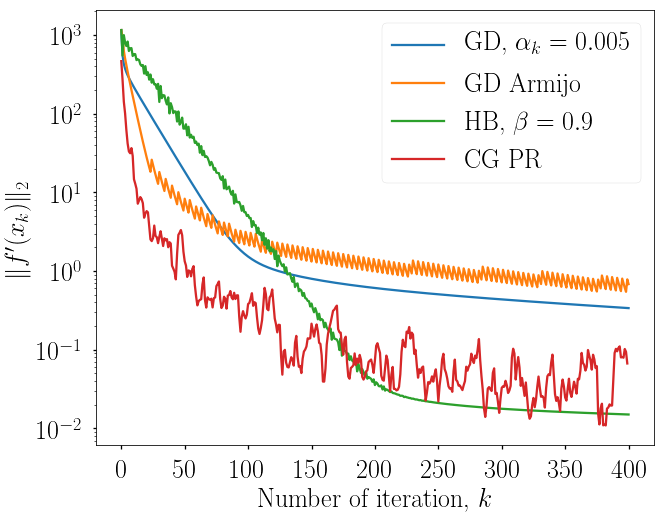

In [69]:
figsize = (10, 8)
fontsize = 26
plt.figure(figsize=figsize)
for m in methods:
    plt.semilogy([np.linalg.norm(grad(x)) for x in methods[m].get_convergence()], label=m)
plt.semilogy([np.linalg.norm(grad(x)) for x in scopt_cg_array], label="CG PR")
plt.legend(fontsize=fontsize, loc="best")
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$\| f'(x_k)\|_2$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

In [43]:
for m in methods:
    print(m)
    %timeit methods[m].solve(x0=x0, max_iter=max_iter, tol=tol)

GD, $\alpha_k = 0.001$
53.1 ms ± 11.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
GD Armijo
613 ms ± 32.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
HB, $\beta = 0.9$
57.2 ms ± 11.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Главное про метод тяжёлого шарика

- Двухшаговый метод
- Не обязательно монотонный
- Параметры зависят от неизвестных констант
- Решает проблему осцилляций для плохо обусловленных задач
- Сходимость для сильно выпуклых функций совпадает с оптимальной оценкой

## Ускоренный метод Нестерова

-  [Предложен](http://vsokolov.org/courses/750/files/nesterov.pdf) в 1983 г. [Ю.Е. Нестеровым](https://scholar.google.ru/citations?user=DJ8Ep8YAAAAJ&hl=ru&oi=ao)
<img src="./nesterov.jpeg">
- Одна из возможных форм записи 

\begin{equation*}
\begin{split}
& y_0 = x_0 \\
& x_{k+1} = y_k - \alpha_k f'(y_k)\\
& y_{k+1} = x_{k+1} + \frac{k}{k + 3} (x_{k+1} - x_k)
\end{split}
\end{equation*}

- Сравните с методом тяжёлого шарика
- Tакже не обязательно монотонен
- Для любителей геометрии есть альтернативный метод под названием [geometric descent](https://arxiv.org/pdf/1506.08187.pdf) с такой же скоростью сходимости 

### Геометрическая интерпретация ускоренного метода Нестерова

<img src="nesterov_plot.png" width=600>

## Теорема сходимости

- Пусть $f$ выпукла с Липшицевым градиентом, а шаг $\alpha_k = \frac{1}{L}$. Тогда ускоренный метод Нестерова сходится как 

$$
f(x_k) - f^* \leq \frac{2L \|x_0 - x^*\|_2^2}{(k+1)^2}
$$ 

- Пусть $f$ сильно выпукла с липшицевым градиентом. Тогда ускоренный метод Нестерова при шаге $\alpha_k = \frac{1}{L}$ сходится как

$$
f(x_k) - f^* \leq L\|x_k - x_0\|_2^2 \left(1 - \frac{1}{\sqrt{\kappa}} \right)^k
$$

### Тестовая задача 

$$
f(x) = \frac{1}{2}x^{\top}Ax - b^{\top}x \to \min_x,
$$

где матрица $A$ положительно полуопределённая, то есть функция **НЕ** является сильно выпуклой

In [44]:
np.random.seed(42)
n = 100
A = np.random.randn(n, n)
A = A.T.dot(A)
A_eigvals = np.linalg.eigvalsh(A)
mu = np.min(A_eigvals)
A = A - mu * np.eye(n)
x_true = np.random.randn(n)
b = A.dot(x_true)
f = lambda x: 0.5 * x.dot(A.dot(x)) - b.dot(x)
grad = lambda x: A.dot(x) - b
A_eigvals = np.linalg.eigvalsh(A)
L = np.max(A_eigvals)
mu = np.min(A_eigvals)
print(L, mu)

388.0518297880793 -2.744439492133101e-14


In [45]:
beta_test = 0.9
methods = {
    "GD fixed": fo.GradientDescent(f, grad, ss.ConstantStepSize(1 / L)),
    "GD Armijo": fo.GradientDescent(f, grad, 
            ss.Backtracking("Armijo", rho=0.5, beta=0.1, init_alpha=1.)),
    r"HB, $\beta = {}$".format(beta_test): HeavyBall(f, grad, ss.ConstantStepSize(1 / L), beta=beta_test),
    "Nesterov": fo.AcceleratedGD(f, grad, ss.ConstantStepSize(1 / L)),
}
x0 = np.random.randn(n)
max_iter = 2000
tol = 1e-6

In [46]:
for m in methods:
    _ = methods[m].solve(x0=x0, max_iter=max_iter, tol=tol)

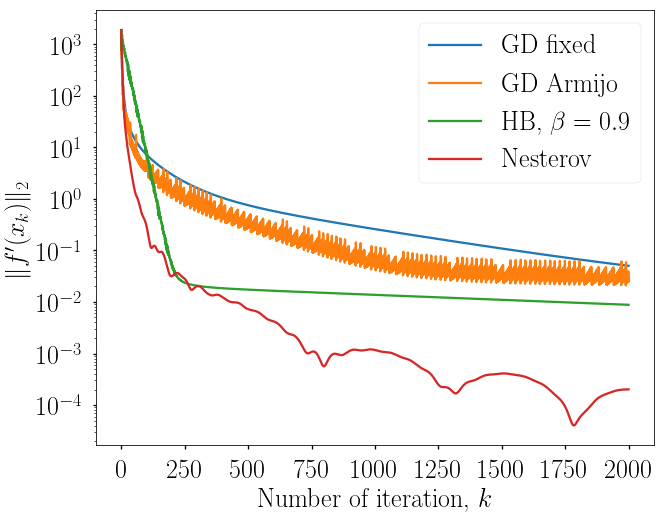

In [47]:
figsize = (10, 8)
fontsize = 26
plt.figure(figsize=figsize)
for m in methods:
    plt.semilogy([np.linalg.norm(grad(x)) for x in methods[m].get_convergence()], label=m)
plt.legend(fontsize=fontsize, loc="best")
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$\| f'(x_k)\|_2$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

In [48]:
for m in methods:
    print(m)
    %timeit methods[m].solve(x0=x0, max_iter=max_iter, tol=tol)

GD fixed
47.7 ms ± 4.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
GD Armijo
686 ms ± 131 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
HB, $\beta = 0.9$
57 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Nesterov
76.6 ms ± 16.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Главное про ускоренный метод Нестерова

- Теоретически оптимальная скорость сходимости для выпуклых и сильно выпуклых функций
- Необходимо подбирать шаг (один из вариантов ниже)
- Волнообразное поведение может быть подавлено с помощью [рестартов](https://arxiv.org/pdf/1204.3982.pdf)
- Нелинейные композиции градиентов могут дать более быстрые на практике методы (см самое начало семинара)
- Оригинальное доказательство сложно понять на интуитивном уровне, есть гораздо более простые подходы, будут рассказаны позднее

## Резюме

- Нижние оценки для методов первого порядка
- Метод тяжёлого шарика
- Ускоренный метод Нестерова
- Поиск константы Липшица градиента $L$